In [53]:
# Import dependencies
import pandas as pd
import numpy as np

from pathlib import Path
from collections import Counter

import matplotlib.pyplot as plt

# Import Data File

In [2]:
# Import data file
county_data_df = pd.read_csv("complete_county_data.csv")

county_data_df.head()

,fips_code,est_hesitant,est_strongly_hesitant,svi,svi_category,cvac,cvac_category,percent_hispanic,percent_american_indian_alaska_native,percent_asian,...,Unemployment,percentage20_Donald_Trump,percentage20_Joe_Biden,county_y,state_y,population,density,hesitancy,population_scaled,Winning_candidate_2020
0,1001,0.22,0.10,0.44,Moderate Vulnerability,0.61,High Vulnerability,0.0283,0.0025,0.0103,...,5.2,0.715,0.270,Autauga County,AL,55514,urban,moderate hesitancy,5.5514,Trump
1,1003,0.20,0.10,0.22,Low Vulnerability,0.23,Low Vulnerability,0.0456,0.0065,0.0092,...,5.5,0.762,0.223,Baldwin County,AL,190790,urban,moderate hesitancy,19.0790,Trump
2,1005,0.23,0.11,1.00,Very High Vulnerability,0.89,Very High Vulnerability,0.0436,0.0029,0.0048,...,12.4,0.536,0.456,Barbour County,AL,27201,rural,moderate hesitancy,2.7201,Trump
3,1007,0.24,0.12,0.60,High Vulnerability,0.76,High Vulnerability,0.0257,0.0013,0.0012,...,8.2,0.784,0.207,Bibb County,AL,22597,urban,moderate hesitancy,2.2597,Trump
4,1009,0.23,0.11,0.42,Moderate Vulnerability,0.80,High Vulnerability,0.0926,0.0007,0.0037,...,4.9,0.896,0.096,Blount County,AL,57826,urban,moderate hesitancy,5.7826,Trump


# Split the Data into Training and Testing

In [3]:
# Choose Independent variables
X = county_data_df[["percent_white","percent_hispanic", "percent_american_indian_alaska_native",
                        "percent_asian", "percent_black", "percent_hawaiian_pacific", "Poverty", 
                        "ChildPoverty", "Drive","Carpool", "Transit", "Walk", "OtherTransp",
                        "WorkAtHome", "PrivateWork", "PublicWork", "SelfEmployed", "FamilyWork", "Unemployment", 
                        "percentage20_Donald_Trump", "percentage20_Joe_Biden", "population_scaled"]]

# Create our target
y = county_data_df['hesitancy']

X.describe()

,percent_white,percent_hispanic,percent_american_indian_alaska_native,percent_asian,percent_black,percent_hawaiian_pacific,Poverty,ChildPoverty,Drive,Carpool,...,OtherTransp,WorkAtHome,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,percentage20_Donald_Trump,percentage20_Joe_Biden,population_scaled
count,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,...,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,0.765595,0.094774,0.015703,0.013121,0.089487,0.000797,16.016878,22.153821,79.857333,9.895642,...,1.521854,4.798081,75.203187,16.743545,7.771089,0.283447,6.326407,0.653608,0.329154,9.977227
std,0.199056,0.139029,0.065532,0.026105,0.144267,0.003888,6.547258,10.308046,6.661486,2.901009,...,1.141899,3.088986,7.343466,5.963499,3.875747,0.453048,2.992911,0.159027,0.157901,32.134315
min,0.006900,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000,0.000000,6.000000,0.000000,...,0.000000,0.000000,31.100000,4.400000,0.000000,0.000000,0.000000,0.088000,0.031000,0.007100
25%,0.648300,0.022200,0.001200,0.002800,0.006450,0.000000,11.400000,14.900000,77.400000,8.100000,...,0.800000,2.900000,71.800000,12.600000,5.200000,0.100000,4.400000,0.565000,0.208000,1.115350
50%,0.838500,0.042400,0.002800,0.006100,0.022000,0.000100,15.200000,21.200000,81.000000,9.500000,...,1.300000,4.100000,76.300000,15.700000,6.800000,0.200000,6.000000,0.686000,0.297000,2.581500
75%,0.925200,0.097950,0.006600,0.012600,0.099450,0.000600,19.450000,27.800000,84.000000,11.300000,...,1.900000,5.800000,80.300000,19.400000,9.200000,0.300000,7.800000,0.775500,0.418000,6.660800
max,1.000000,0.991700,0.901900,0.417300,0.872300,0.110800,52.000000,76.500000,97.200000,29.300000,...,13.800000,33.000000,88.800000,64.800000,38.000000,8.000000,28.700000,0.962000,0.896000,996.278900


In [4]:
from sklearn.model_selection import train_test_split

# Data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# Fit scaler on training data
#norm = MinMaxScaler().fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

print(Counter(y_train))
print(Counter(y_test))

Counter({'moderate hesitancy': 1641, 'low hesitancy': 380, 'high hesitancy': 285})
Counter({'moderate hesitancy': 558, 'low hesitancy': 119, 'high hesitancy': 92})


# Logistic Regression Model

In [9]:
# Import regression model
from sklearn.linear_model import LogisticRegression

# Instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='saga', random_state=1)

# Fit the model with data
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print(y_pred.shape)

(769,)


In [10]:
# Print coefficients
print(logreg.coef_)

[[-1.46116916 -2.71613215  2.3557057  -0.82048813  3.44350512  0.12201343
   2.40099358  0.21221037 -0.25618851 -0.03447955 -0.20576052  1.06750116
   0.36998106 -0.48515967 -0.7451212  -0.04763786  1.04031555  0.82378446
  -0.78715138  2.08258652 -2.66222262 -0.37468956]
 [ 0.85540673  1.27813883 -0.72966382  1.87757294 -3.0443312   0.5887336
  -3.24053367 -0.83468015 -0.53588843  0.14563458  1.06780697 -1.43757283
  -0.52564742  1.26891504 -0.0067022   0.6164534  -0.81629471 -0.82744478
  -0.06506592 -2.92425815  2.61269498  0.03250821]
 [ 0.60576242  1.43799332 -1.62604188 -1.05708482 -0.39917392 -0.71074703
   0.83954008  0.62246978  0.79207693 -0.11115503 -0.86204645  0.37007167
   0.15566636 -0.78375537  0.7518234  -0.56881553 -0.22402084  0.00366031
   0.8522173   0.84167163  0.04952764  0.34218135]]


In [11]:
# Print intercept values
print(logreg.intercept_)

[-0.26469261  1.3820545  -1.11736189]


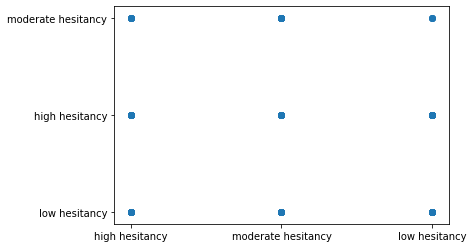

In [44]:
# Test model with predictions
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test, y_pred)

In [28]:
# Import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 56,  14,  22],
       [ 14,  79,  26],
       [175,  95, 288]], dtype=int64)

In [29]:
# Print accuracy, precision, recall
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred,
                                          average='micro'))

print("Recall:",metrics.recall_score(y_test, y_pred, 
                                     average='micro'))

Accuracy: 0.5500650195058517
Precision: 0.5500650195058517
Recall: 0.5500650195058517


In [31]:
# Print classification report
print(metrics.classification_report(y_test, y_pred))

print(classification_report_imbalanced(y_test, y_pred))

                    precision    recall  f1-score   support

    high hesitancy       0.23      0.61      0.33        92
     low hesitancy       0.42      0.66      0.51       119
moderate hesitancy       0.86      0.52      0.64       558

          accuracy                           0.55       769
         macro avg       0.50      0.60      0.50       769
      weighted avg       0.71      0.55      0.59       769

                          pre       rec       spe        f1       geo       iba       sup

    high hesitancy       0.23      0.61      0.72      0.33      0.66      0.43        92
     low hesitancy       0.42      0.66      0.83      0.51      0.74      0.54       119
moderate hesitancy       0.86      0.52      0.77      0.64      0.63      0.39       558

       avg / total       0.71      0.55      0.78      0.59      0.65      0.42       769



# Oversampling

### Naive Random Oversampling

In [55]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'high hesitancy': 1641,
         'moderate hesitancy': 1641,
         'low hesitancy': 1641})

In [18]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

C:\Users\Dani-PC\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

In [48]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5990332707806513

In [49]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 71,  15,   6],
       [ 20,  96,   3],
       [291, 145, 122]], dtype=int64)

In [50]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                          pre       rec       spe        f1       geo       iba       sup

    high hesitancy       0.19      0.77      0.54      0.30      0.65      0.43        92
     low hesitancy       0.38      0.81      0.75      0.51      0.78      0.61       119
moderate hesitancy       0.93      0.22      0.96      0.35      0.46      0.19       558

       avg / total       0.76      0.38      0.88      0.37      0.53      0.29       769



### SMOTE Oversampling

In [22]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)
Counter(y_resampled)

Counter({'high hesitancy': 1641,
         'moderate hesitancy': 1641,
         'low hesitancy': 1641})

In [23]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

C:\Users\Dani-PC\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

In [24]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5962300768834883

In [25]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 56,  14,  22],
       [ 14,  79,  26],
       [175,  95, 288]], dtype=int64)

In [26]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                          pre       rec       spe        f1       geo       iba       sup

    high hesitancy       0.23      0.61      0.72      0.33      0.66      0.43        92
     low hesitancy       0.42      0.66      0.83      0.51      0.74      0.54       119
moderate hesitancy       0.86      0.52      0.77      0.64      0.63      0.39       558

       avg / total       0.71      0.55      0.78      0.59      0.65      0.42       769



# Undersampling

In [32]:
# Resample the data using the ClusterCentroids resampler
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'high hesitancy': 285,
         'low hesitancy': 285,
         'moderate hesitancy': 285})

In [33]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

C:\Users\Dani-PC\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

In [34]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5962300768834883

In [35]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 70,  10,  12],
       [ 12,  80,  27],
       [291, 148, 119]], dtype=int64)

In [37]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                          pre       rec       spe        f1       geo       iba       sup

    high hesitancy       0.19      0.76      0.55      0.30      0.65      0.43        92
     low hesitancy       0.34      0.67      0.76      0.45      0.71      0.50       119
moderate hesitancy       0.75      0.21      0.82      0.33      0.42      0.16       558

       avg / total       0.62      0.35      0.77      0.35      0.49      0.25       769



# Combination (Over and Under) Sampling

In [38]:
# Resample the training data with SMOTEENN
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
Counter(y_resampled)

Counter({'high hesitancy': 2063,
         'low hesitancy': 2034,
         'moderate hesitancy': 826})

In [39]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

C:\Users\Dani-PC\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

In [40]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5488000405086454

In [41]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 71,  15,   6],
       [ 20,  96,   3],
       [291, 145, 122]], dtype=int64)

In [42]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                          pre       rec       spe        f1       geo       iba       sup

    high hesitancy       0.19      0.77      0.54      0.30      0.65      0.43        92
     low hesitancy       0.38      0.81      0.75      0.51      0.78      0.61       119
moderate hesitancy       0.93      0.22      0.96      0.35      0.46      0.19       558

       avg / total       0.76      0.38      0.88      0.37      0.53      0.29       769

